# Data Quality One Week of Data - Iteration 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
matplotlib.style.use('ggplot')
%matplotlib inline

In [4]:
df = pd.read_csv('../datasets/output_files/Dublin_2012_Step2.csv')

C:\Users\pamel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,Unnamed: 0,Timestamp,Journey_Pattern_ID,Date,Vehicle_Journey_ID,Lon_WGS84,Lat_WGS84,Delay,Stop_ID,At_Stop,Distance_Terminal,datetime,day_of_week,Trip_Time
0,0,1352160000,00150001,2012-11-05,5826,-6.258584,53.340099,-361,4870,0,0.0,2012-11-06 00:00:00,Tuesday,0
1,1,1352160000,046A1002,2012-11-05,7267,-6.259093,53.345425,-1101,794,0,0.0,2012-11-06 00:00:00,Tuesday,0
2,2,1352160000,00140001,2012-11-05,6206,-6.257329,53.287521,-126,1047,0,0.0,2012-11-06 00:00:00,Tuesday,0
3,3,1352160002,041B0002,2012-11-05,61,-6.264167,53.453217,-623,3874,1,0.0,2012-11-06 00:00:02,Tuesday,0
4,4,1352160002,039A1002,2012-11-05,3795,-6.262447,53.346767,-532,1479,0,0.0,2012-11-06 00:00:02,Tuesday,0


In [6]:
df.drop(df.columns[[0]], axis=1, inplace=True)

In [7]:
# dropping columns that we won't have from the user side as input so therefore we can't train the model based on those features
# such as delay, congestion and date can't be used either (too specific)

In [8]:
df.shape

(3169731, 13)

In [9]:
df.tail(3)

,Timestamp,Journey_Pattern_ID,Date,Vehicle_Journey_ID,Lon_WGS84,Lat_WGS84,Delay,Stop_ID,At_Stop,Distance_Terminal,datetime,day_of_week,Trip_Time
3169728,1352764796,00331005,2012-11-12,269,-6.109184,53.580326,-36,3818,0,7483.98,2012-11-12 23:59:56,Monday,581
3169729,1352764796,00380001,2012-11-12,1269,-6.375340,53.399990,154,1819,0,16435.03,2012-11-12 23:59:56,Monday,2824
3169730,1352764798,015A0001,2012-11-12,3130,-6.299134,53.311970,267,1089,0,8033.41,2012-11-12 23:59:58,Monday,1779


In [10]:
df.dtypes

Timestamp               int64
Journey_Pattern_ID     object
Date                   object
Vehicle_Journey_ID      int64
Lon_WGS84             float64
Lat_WGS84             float64
Delay                   int64
Stop_ID                object
At_Stop                 int64
Distance_Terminal     float64
datetime               object
day_of_week            object
Trip_Time               int64
dtype: object

In [31]:
continuous_features = ['Distance_Terminal', 'Trip_Time','Timestamp']
categorical_features = ['Journey_Pattern_ID', 'Date', 'Vehicle_Journey_ID','day_of_week']



In [32]:
for item in categorical_features:
    df[item] = df[item].astype('category')

In [33]:
df.dtypes

Timestamp                int64
Journey_Pattern_ID    category
Date                  category
Vehicle_Journey_ID    category
Lon_WGS84              float64
Lat_WGS84              float64
Delay                    int64
Stop_ID               category
Distance_Terminal      float64
datetime                object
day_of_week           category
Trip_Time                int64
dtype: object

## Prepare a table with descriptive statistics for all continuous features

In [34]:
df[continuous_features].describe().T
plt.savefig('desc_stats_continuous_week1_v1.png')

In [35]:
df_max_trip=df.loc[df['Distance_Terminal']>50000]
df_max_trip

,Timestamp,Journey_Pattern_ID,Date,Vehicle_Journey_ID,Lon_WGS84,Lat_WGS84,Delay,Stop_ID,Distance_Terminal,datetime,day_of_week,Trip_Time


In [36]:
# 30 (31240, 13)  40 (2744, 13) 50 (2744, 13)
df_max_trip.shape

(0, 12)

In [37]:
df_max_trip=df.loc[(df['Vehicle_Journey_ID']==3804) & (df['day_of_week']=='Friday')]
df_max_trip

,Timestamp,Journey_Pattern_ID,Date,Vehicle_Journey_ID,Lon_WGS84,Lat_WGS84,Delay,Stop_ID,Distance_Terminal,datetime,day_of_week,Trip_Time
1829452,1352476724,039A0001,2012-11-09,3804,-6.216970,53.306770,-103,767,0.00,2012-11-09 15:58:44,Friday,0
1830348,1352476822,039A0001,2012-11-09,3804,-6.218855,53.309505,-99,768,472.67,2012-11-09 16:00:22,Friday,98
1830891,1352476882,039A0001,2012-11-09,3804,-6.219975,53.310287,-59,768,587.33,2012-11-09 16:01:22,Friday,158
1831079,1352476902,039A0001,2012-11-09,3804,-6.221674,53.312637,-88,769,872.33,2012-11-09 16:01:42,Friday,178
1831942,1352476999,039A0001,2012-11-09,3804,-6.225667,53.314777,-34,770,1235.52,2012-11-09 16:03:19,Friday,275
1831989,1352477003,039A0001,2012-11-09,3804,-6.227878,53.316151,-57,771,1447.88,2012-11-09 16:03:23,Friday,279
1832307,1352477041,039A0001,2012-11-09,3804,-6.231356,53.318680,-57,772,1812.49,2012-11-09 16:04:01,Friday,317
1832686,1352477084,039A0001,2012-11-09,3804,-6.234359,53.320904,-96,773,2130.78,2012-11-09 16:04:44,Friday,360
1832885,1352477103,039A0001,2012-11-09,3804,-6.237105,53.322258,-133,774,2367.83,2012-11-09 16:05:03,Friday,379
1833248,1352477144,039A0001,2012-11-09,3804,-6.239009,53.323555,-133,775,2560.37,2012-11-09 16:05:44,Friday,420


In [38]:
from geopy.distance import distance

distance((53.353233, -6.274066), (53.391613, -6.436800)).meters

11643.083201606076

In [39]:
df=df.drop(df.index[df['Distance_Terminal']>50000])

## Prepare a table with descriptive statistics for all categorical features

In [40]:
df[categorical_features].describe().T
plt.savefig('desc_stats_categorical_week1_v1.png')

## Drop duplicate rows and columns, if any

In [41]:
df.drop_duplicates(keep='first')
df.shape

(3166987, 12)

In [42]:
df.head(3)

,Timestamp,Journey_Pattern_ID,Date,Vehicle_Journey_ID,Lon_WGS84,Lat_WGS84,Delay,Stop_ID,Distance_Terminal,datetime,day_of_week,Trip_Time
0,1352160000,00150001,2012-11-05,5826,-6.258584,53.340099,-361,4870,0.0,2012-11-06 00:00:00,Tuesday,0
1,1352160000,046A1002,2012-11-05,7267,-6.259093,53.345425,-1101,794,0.0,2012-11-06 00:00:00,Tuesday,0
2,1352160000,00140001,2012-11-05,6206,-6.257329,53.287521,-126,1047,0.0,2012-11-06 00:00:00,Tuesday,0


## Drop constance columns, if any

## Prepare descriptive stats for new df

## For Continuous Features

In [44]:
df[continuous_features].describe(include="all").T
plt.savefig('desc_stats_continuous_week1_v1_t2.png')
# how to include cardinality and % of missing values? 

In [45]:
# check for missing values
df[continuous_features].isnull().sum()

Distance_Terminal    0
Trip_Time            0
Timestamp            0
dtype: int64

In [46]:
# check cardinality
card_list = []
count_list = []
continuous_columns = df[continuous_features].columns
for column in continuous_columns:
    card_list.append(df[column].nunique())
    count_list.append(df[column].count())
    
df_cardinality = pd.DataFrame({'Feature': continuous_features, 'Card': card_list, 'Count': count_list})
plt.savefig('cardinality_continuous_week1_v1.png')

In [47]:
df_cardinality

,Card,Count,Feature
0,1760571,3166987,Distance_Terminal
1,8554,3166987,Trip_Time
2,183168,3166987,Timestamp


## For Categorical Features

### Notes from machinelearningbook.com
"The table in the data quality report that describes categorical features should include a row for each feature in the ABT that contains the two most frequent levels for the feature (the mode and 2nd mode) and the frequency with which these appear (both as raw frequencies and as a proportion of the total number of instances in the dataset). Each row should also include the percentage of instances in the ABT that are missing a value for the feature and the cardinality of the feature." - p56

In [48]:
# remove at_stop from list of categorical features
#categorical_features.pop(7)
print(categorical_features)
df[categorical_features].describe().T
plt.savefig('desc_stats_categorical_week1_v1_t2.png')

['Journey_Pattern_ID', 'Date', 'Vehicle_Journey_ID', 'day_of_week']


In [49]:
# check for missing values
df[categorical_features].isnull().sum()

Journey_Pattern_ID    0
Date                  0
Vehicle_Journey_ID    0
day_of_week           0
dtype: int64

In [50]:
# check cardinality
card_list = []
count_list = []
categorical_columns = df[categorical_features].columns
for column in categorical_columns:
    card_list.append(df[column].nunique())
    count_list.append(df[column].count())
    
df_cardinality_cat = pd.DataFrame({'Feature': categorical_features, 'Card': card_list, 'Count': count_list})
plt.savefig('cardinality_categorical_week1_v1.png')

In [51]:
df_cardinality_cat

,Card,Count,Feature
0,471,3166987,Journey_Pattern_ID
1,8,3166987,Date
2,17400,3166987,Vehicle_Journey_ID
3,7,3166987,day_of_week


## Plot histograms for all continuous features

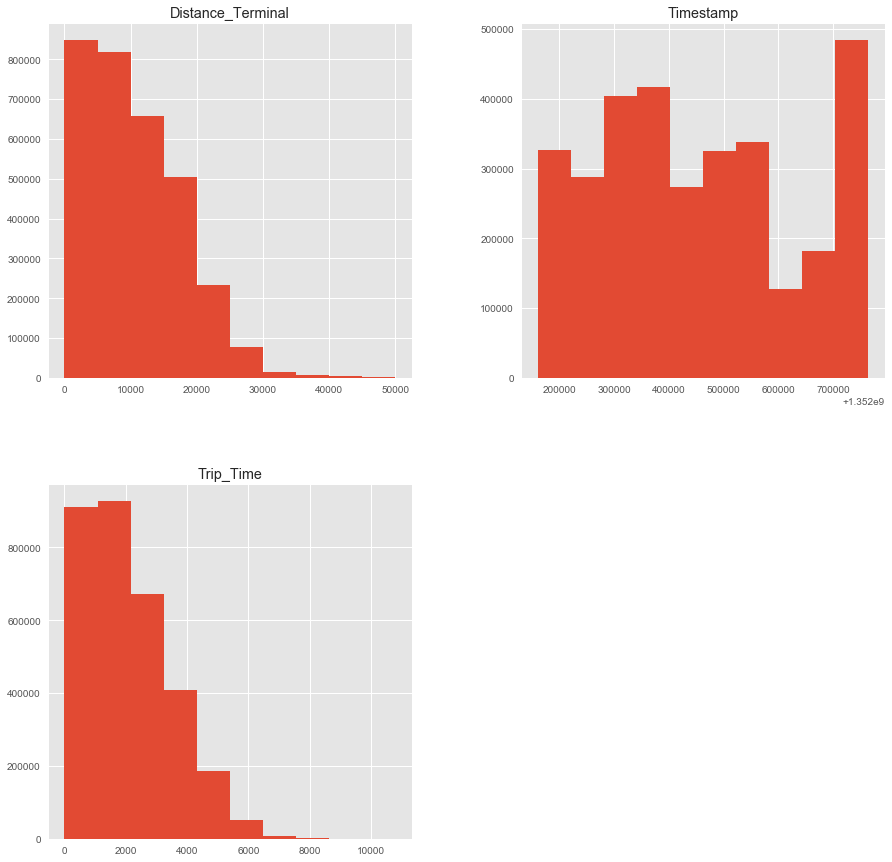

In [52]:
continuous_columns = df[continuous_features].columns
df[continuous_columns].hist(figsize=(15, 15))
plt.savefig('histograms_continuous_week1_v1.jpg')

## Plot Box Plots for all Continuous Features

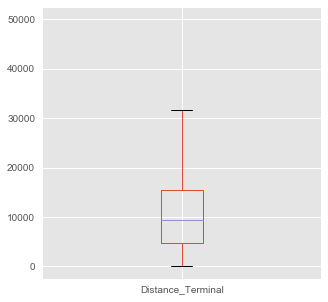

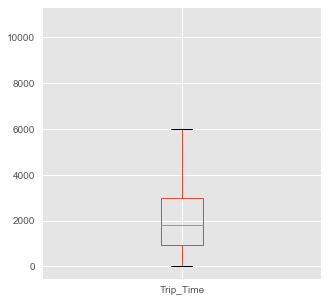

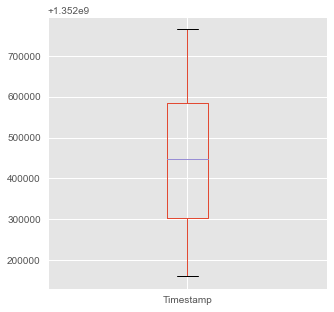

In [53]:
%matplotlib inline

for col in continuous_columns:
    f = df[col].plot(kind='box', figsize=(5, 5))
    plt.savefig(col + '_boxplot_week1_v1.jpg')
    plt.show()

## Plot Bar Plots for all the Categorical Features

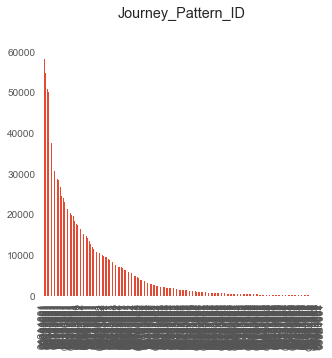

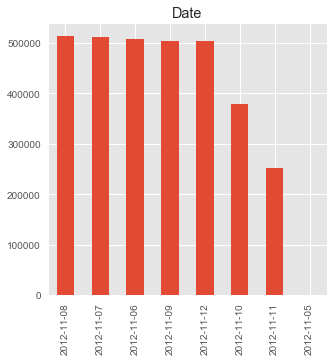

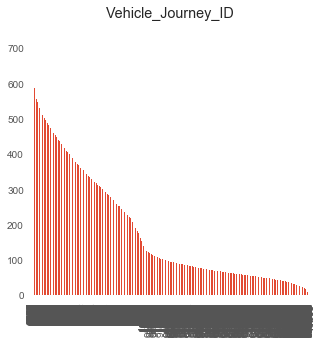

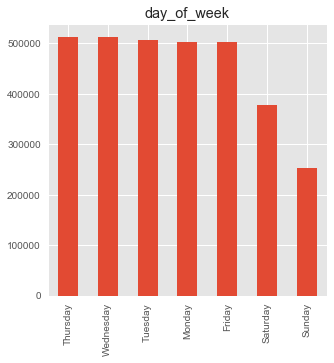

In [54]:
%matplotlib inline
categorical_columns = df[categorical_features].columns

for column in categorical_columns:
    f = df[column].value_counts().plot(kind='bar', title=column, figsize=(5, 5))
    plt.savefig(column + '_barplots_week1_v1.jpg')
    plt.show()

## Data Quality Issues

### Continuous Features

## Issue 1: 
### Trip Time: Max Value is 23hours - must be an error (invalid data because this is a derived feature)
### Distance Terminal: Max Value is 318km - must be an error (invalid data because this is a derived feature)
#### For both of these we will need to find and fix the error and regenerate the ABT

## Data Understanding

### Print the correlations between the continuous features

In [55]:
sns.set(style='white')
corr = df[continuous_features].corr()
print(corr)

                   Distance_Terminal  Trip_Time  Timestamp
Distance_Terminal           1.000000   0.865238   0.004863
Trip_Time                   0.865238   1.000000  -0.032009
Timestamp                   0.004863  -0.032009   1.000000


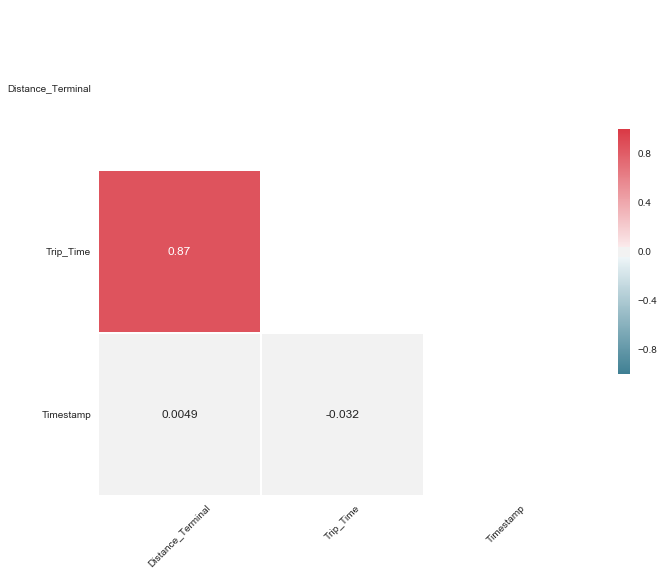

In [56]:
# a nicer representation of correlations 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colour map - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
           square=True, xticklabels=True, yticklabels=True,
           linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)
plt.savefig('feature_correlation_matrix_week1_v1.png')

## Plot the scatter plots of each pair of continuous descriptive features and target feature

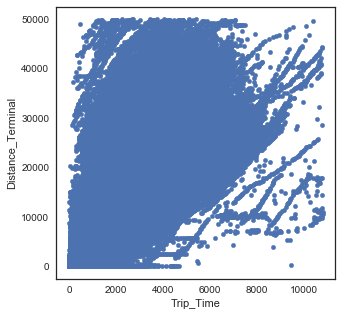

In [57]:
% matplotlib inline
df.plot(kind='scatter', x='Trip_Time', y='Distance_Terminal',  figsize=(5, 5))
plt.savefig("trip_time_distance_relationship_week1_v1.png")

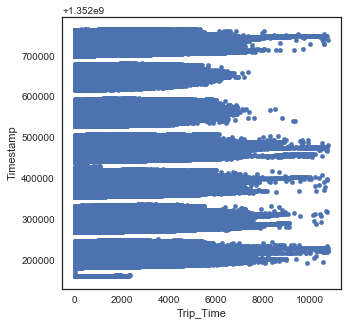

In [58]:
% matplotlib inline
df.plot(kind='scatter', x='Trip_Time', y='Timestamp', figsize=(5, 5))
plt.savefig("trip_time_timestamp_relationship_week1_v1.png")

## For each categorical feature, plot the pairwise interaction with the target feature (barplots or stacked barplots)

In [59]:
print(categorical_features)

['Journey_Pattern_ID', 'Date', 'Vehicle_Journey_ID', 'day_of_week']


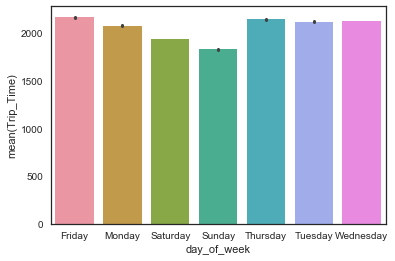

In [60]:
sns.barplot(x="day_of_week", y="Trip_Time", data=df)
plt.savefig("trip_time_day_relationship_week1_v1.png")

In [61]:
input("Please enter your input: ")

Please enter your input: hello


'hello'

### There are too many unique values in the other categorical features to plot them - should we look at binning them? 

# Modeling
### Despite the data quality issues, we need to have a model to connect to the front end. This model will be a placeholder until we resolve the issues with our data cleaning. 

In [66]:
import sklearn
import statsmodels.formula.api as sm
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

ImportError: cannot import name 'csr_row_norms'

### As this is a regression problem (we are trying to predict a continuous feature) I'm going to start with a simple linear/multiple regression model. 

In [ ]:
df = pd.read_csv('sample_week_analysis.csv')

In [ ]:
df.drop(df.columns[[0]], axis=1, inplace=True)
df.head()

## Split the Data into Training and Test Sets

In [ ]:
df=df.loc[df['Journey_Pattern_ID']=='041B0002']
df.shape

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

In [ ]:
feature_cols = ['Distance_Terminal','day_of_week']
X = df[feature_cols]
y = df['Trip_Time']
X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X['Journey_Pattern_ID'] = X['Journey_Pattern_ID'].astype('object')
X['day_of_week'] = X['day_of_week'].astype('object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in X.columns.values:
    if X[col].dtypes=='object':
        # Using whole data to form an exhaustive list of levels
        data=X[col]
        le.fit(data.values)
        X[col]=le.transform(X[col])
X

In [ ]:
df_linear = pd.concat([X_train, y_train], axis=1)
lm = sm.ols(formula = "Trip_Time ~ Distance_Terminal", data=df_linear).fit()

In [ ]:
lm.params

In [ ]:
lm.summary()

In [ ]:
lm_predictions = lm.predict(X_test)

In [ ]:
df.plot(kind='scatter', x='Distance_Terminal', y='Trip_Time')
plt.plot(y_test, lm_predictions, c='red', linewidth=2)

plt.savefig('books_read.png')

In [ ]:
lm.conf_int()

In [ ]:
lm.pvalues

In [ ]:
lm.rsquared

### Needed to use an sklearn model instead of statsmodels because I couldn't get the pickle to work with statsmodels. 

In [ ]:
from sklearn.linear_model import LinearRegression
lm_sk = LinearRegression()
lm_sk.fit(X, y)

In [ ]:
import pickle

In [ ]:
pickle.dump(lm_sk, open('sk_linear_model1', 'wb'))

In [ ]:
loaded_model = pickle.load(open('sk_linear_model1', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

# SVM

In [ ]:
#Import SVM and assign to a model 
from sklearn import svm
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
clf = svm.SVR()

In [ ]:
# Prepare the descriptive features
X = pd.concat([df[['Distance_Terminal']]], axis=1)
y = df.Trip_Time 

print("Descriptive features:\n", X)
print("\nTarget feature:\n", y)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in X.columns.values:
    if X[col].dtypes=='object':
        # Using whole data to form an exhaustive list of levels
        data=X[col]
        le.fit(data.values)
        X[col]=le.transform(X[col])
X

In [ ]:
# Train the model 
%time clf.fit(X, y)

In [ ]:
# Get the predicetion 
y_rbf = clf.predict(X)
y_rbf

In [ ]:
plt.scatter(X['Distance_Terminal'], y, color='darkorange', label='data')
plt.plot(X['Distance_Terminal'], y_rbf, color='navy', label='RBF model')
plt.savefig('SVM_result.png')

In [ ]:
plt.scatter(X['Distance_Terminal'], y, color='darkorange', label='data')

In [ ]:
plt.plot(X['Distance_Terminal'], y_rbf, color='navy', label='RBF model')
plt.show()